# A complete mini machine learning project

This project aims to apply all the standard methodologies of data science to a real-world business problem.

The business need tackled in this project is to help stakeholders of a construction and cement factory ascertain the 
quality and strength of their concrete mix for buildings and other use cases.

An attempt was made to develop a machine learning application that can predict the comprehensive strength of concrete as 
function of the cement, the age(in days) and other complex features used in preparing it.

Comprehensive Strength explains the capacity of the concrete to withstand loads before failure.
Comprehensive strength of cement concrete is an important property of the mixture that helps in its durability and 
support for use case, as the most important strength test.

It is a complex formula of relationship between age (number of days) and other factors, hence it gives an idea about the
characteristics of the concrete.
The importance of comprehensive strength is that it ensures the overall quality of the finished product. 

The propose methodology is first to defined the business need, and suggest the analytical appraoch to use in solving the 
problem. Further, we'll proceed to identify the source of data and the data requirement for this specific business need.
Again, after we understand the data, we proceed to develop our model and evaluate it. Sequel to this, if our model meets our
business need, we deploy it after every development in the production environment.

Many considerations, such as practical considerations, ethical and security consideration of the model were considered.

The advantage of this business solution is that it will enable stakeholders to minimize loss of resources. This is beacause,
prior to production they will have known what formula of their concrete mix works and which does not work, as compared to
their benchmark even before they began their production.
This approach also aim to maximize profit as the revenue will continue to grow as losses are minimized.

This project is self-inspired and an attempt to understand the Keras library holistically.

by Blibo Albert @bliboalbert <<-github/LinkedIn


# Data sourcing and exploration
The datasets used in this project were downloaded from # kaggle.com


In [2]:
# importing libraries
import keras
import sklearn
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read data into dataframe and explore
data = pd.read_csv('concrete_data.csv')
data.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
msg = 'The dataset contains {} observations and {} variables.'
shape = (data.shape)
print(msg.format(*shape))

The dataset contains 1030 observations and 9 variables.


# Exploratary Data Analysis
We analyse the datapoints in our dataset so as to get clean and good data for our projects.
Besides, we try to identify outliers, estimate relationship between features using their correlation scores.
We again look at the distribution of each feature or variables and their visuals.

In [10]:
# gather information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [41]:
# from above display, our dataset looks neat without any missing values. All data types are float except Age which is integer
# let confirm again if indeed there are no missing values in our data, since this can negatively impact our project
data.isnull().sum() # all variables has no missing values

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [5]:
# maintain original pandas dataframe
workingdf = data

In [56]:
# calculate the mean and median
# the mean indicates the average values for each variable and the median shows the middle number in ascending order
# The median is another statistical measure that helps to show the presence of outliers in the dataset
workingdf.mean()

Cement                281.167864
Blast Furnace Slag     73.895825
Fly Ash                54.188350
Water                 181.567282
Superplasticizer        6.204660
Coarse Aggregate      972.918932
Fine Aggregate        773.580485
Age                    45.662136
Strength               35.817961
dtype: float64

### Explaination for mean values
The average quantity of cement needed for the concrete mixture is 281 units, which will amount to an average comprehensive
strength of 36 units.
Blast Furnance Slag has average value of 74 units, Fly Ash and Water has 54 units and 182 units respectively.
The average age for a concrete to generate enough strength is 47 days.
The mean values can best be interpret if we have a benchmark values for each variable, which must indicate the standard 
for each variable in the dataset

In [51]:
# median
workingdf.median()

Cement                272.900
Blast Furnace Slag     22.000
Fly Ash                 0.000
Water                 185.000
Superplasticizer        6.400
Coarse Aggregate      968.000
Fine Aggregate        779.500
Age                    28.000
Strength               34.445
dtype: float64

### Median values explained
The median is another statistical measure that defines relationships between variables in the dataset.
Median is also an important status to look for, and it is generally used when there are outliers in the dataset.
If there is a huge difference betwwen the variables then it confirms the presence of outliers in the dataset.

from the above result of the mean and median, there are less significant differences between the mean and 
median of some variables.
however, Blast Furnance Slag, Fly Ash, and Age has the huge differences suggesting they might have outliers.

In [58]:
# standard deviation
# in other to detect outliers in the dataset, we must know the distribution of the data
# as this will give us hint about the spread of the data
workingdf.std()

Cement                104.506364
Blast Furnace Slag     86.279342
Fly Ash                63.997004
Water                  21.354219
Superplasticizer        5.973841
Coarse Aggregate       77.753954
Fine Aggregate         80.175980
Age                    63.169912
Strength               16.705742
dtype: float64

### Standard Deviation Explained
Standard deviation of the dataset in each column indicates the distribution of the datapoints, which also give us hint of 
its spread.
Std is a summary measure of the differences of each variable from the mean.
In our dataset, the std of cement is 105 units, which means there is a spread of about 105 units from the mean 281 units.
The std of Strength is about 17 units, which also means there is a spread of about 17 units from the mean 36 units.
Likewise other variables values can be explained with the same understanding.

In [59]:
# checking spread of varaibles in dataset
# minimum and maximum values of dataset
workingdf.min()

Cement                102.00
Blast Furnace Slag      0.00
Fly Ash                 0.00
Water                 121.80
Superplasticizer        0.00
Coarse Aggregate      801.00
Fine Aggregate        594.00
Age                     1.00
Strength                2.33
dtype: float64

In [54]:
workingdf.max()

Cement                 540.0
Blast Furnace Slag     359.4
Fly Ash                200.1
Water                  247.0
Superplasticizer        32.2
Coarse Aggregate      1145.0
Fine Aggregate         992.6
Age                    365.0
Strength                82.6
dtype: float64

### Maximum and Minimum spread of variables in dataset
The max value for cement is 540 units and its min value is 102 units. The max value of Strength and Age is 83 and 
365 respectively. The min Strength and Age is 2 and 1 respectively. Now to better understand these spreads, it is neccessary
to work with benchmarks values to be able to ascertain whether the values are in range or out.
If we define a linear relationship between the variables, we can infer that the strength increases when the cement quantity 
increases and vice versa.


### Detecting Outliers
Any serious data analysis cannot happen unless we know for each column if there are any outliers in the dataset.
In other to detect outliers, we need to first define what it is. Now there are many debates about which method is right to
compute outliers but we will use the commonly used cut-off of 1.5*interquartile  range.
The range of variable can be computed using their max and min values.

In [6]:
# using the cement variable to detect if there is an outlier
# compute the Q1 and Q3 respectively
# range = max() - min()
# interquartile range = Q3 - Q1

In [7]:
# calculate Q1 and Q3
Q1 = workingdf.quantile(0.25)
Q1

Cement                192.375
Blast Furnace Slag      0.000
Fly Ash                 0.000
Water                 164.900
Superplasticizer        0.000
Coarse Aggregate      932.000
Fine Aggregate        730.950
Age                     7.000
Strength               23.710
Name: 0.25, dtype: float64

In [8]:
# Q3 - 75%
Q3 = workingdf.quantile(0.75)
Q3

Cement                 350.000
Blast Furnace Slag     142.950
Fly Ash                118.300
Water                  192.000
Superplasticizer        10.200
Coarse Aggregate      1029.400
Fine Aggregate         824.000
Age                     56.000
Strength                46.135
Name: 0.75, dtype: float64

In [9]:
# calculate the steps 
steps = 1.5*(Q3-Q1)
#steps
lower_fence = Q1 - steps
upper_fence = Q3 + steps
# any values greater than the upper fence is an outlier and anything lower than the lower fence is also an outlier
lower_fence, upper_fence

(Cement                -44.0625
 Blast Furnace Slag   -214.4250
 Fly Ash              -177.4500
 Water                 124.2500
 Superplasticizer      -15.3000
 Coarse Aggregate      785.9000
 Fine Aggregate        591.3750
 Age                   -66.5000
 Strength               -9.9275
 dtype: float64,
 Cement                 586.4375
 Blast Furnace Slag     357.3750
 Fly Ash                295.7500
 Water                  232.6500
 Superplasticizer        25.5000
 Coarse Aggregate      1175.5000
 Fine Aggregate         963.5750
 Age                    129.5000
 Strength                79.7725
 dtype: float64)

In [141]:
# now let us print out all the outliers
outlier_df = workingdf[workingdf[workingdf.columns.values] > upper_fence.values] # outliers in upper fence
outlier_df1 = workingdf[workingdf[workingdf.columns.values] < lower_fence.values] # outliers in lower fence
outlier_df.head(10) # not many variables have outliers

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.99
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,270.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,365.0,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Explain Upper fence and Lower fence values with respect to outliers
Taking only cement varaible for analysis, any value of the cement that is above the upper fence is an outlier.
Likewise, any value of cement that is below the lower fence value is also an outlier.
looking at the table, upper and lower fence value for cement is 586 and -44 respectively. The max value of cement is 540
and min value is 102 hence there are no outliers in the cement variable.
Looking at the Strength variable, upper and lower fence values are 79.7 and -9.9 respectively. Likewise the max and min values
of Strength are 82 and 2 respectively, thus there is one outlier in the Strength variable.

### Visualization of the spread of each of our 9 columns

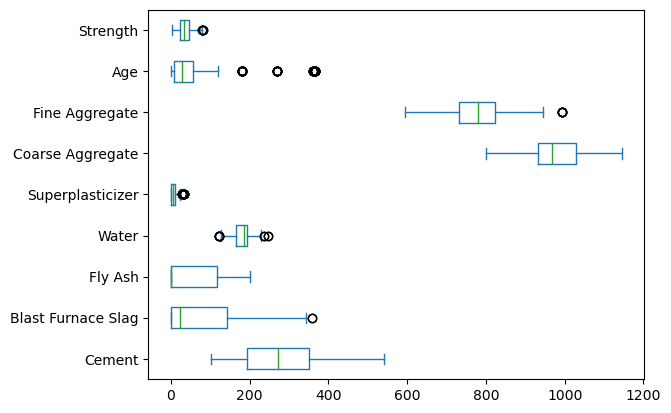

In [58]:
# horizontal and vertical box plots
#workingdf.boxplot(figsize=(10,9)) # vertical box plot
workingdf.plot.box(vert=False) # horizontal boxplot
plt.show()

### Explaination for boxplot
Mostly the boxplot is used to show outliers in a dataset by employing the 5 numbers summary:
    Q1, Q3, mean, Max and Min
as can be infer from the graph above, Cement, Fly Ash, Course Aggregate has no outliers in their values
Age has outliers at the range above the maximum value but no outliers in the lower region. Age has the most outliers,
with very huge values. The rest of the variables has outliers but with not so much significant values.
Since the Age variable has great impact on the strength of the concrete, we cannot remove it from the dataset. We have to as 
solution to this effect choose a ML algorith that is robust to outliers - Decision Tree Regressor or NN

In [85]:
# calculate correlation coefficient of dataset to check how each variable are dependent or independent on one another
workingdf.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


### Correlation Coefficient Results
We tried to find if there are any significant relationship between the various variables. Since our target variable in this
project is the Strength variable, we will most likely see how each other variables affects its values.
Cement, Blast Furnance Slag, Superplasticizer, Age has a positive relationship with the strength variable, although not a 
strong one. Thus, the strength of the concrete increases as each of these variables also increases.
The other variables has a negative relationship with the strength variable, indicating a decrease in strength as they also
decrease.
#### More meaning to correlation coefficient values:
if the correlation value equal to +1 between two variables, it indicates perfect positive linear relationship, and if it is -1
means perfect negative relationship. if the correlation value equal 0, it means there is no really linear relationship the 
two variables. values between 0.3-0.34 has weak linear relationship, values between -0.5, +0.5  are said to have a 
moderate linear relationship, values between-0.7, +0.7 have a very strong linear relationship.
from our result above, the linear relationship, positive or negative are weak and moderate between each other variable except
themselves.
these conclusions can also help us in feature selection. But we will not apply that seeing that we have less features.

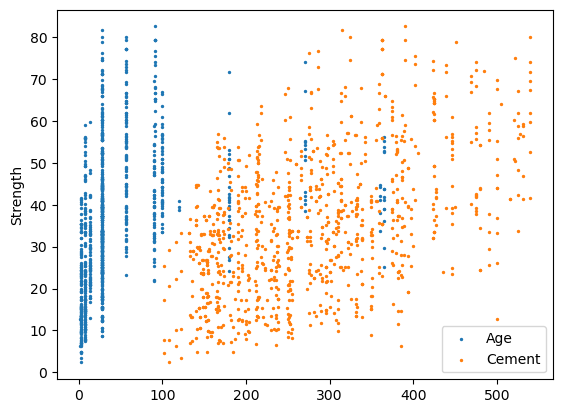

In [66]:
# visualize relationship between strength, cement and age variables
plt.scatter(data=workingdf, x='Age', y='Strength', label='Age', s=2)
plt.scatter(data=workingdf, x='Cement', y='Strength', label='Cement', s=2)
plt.legend()
plt.ylabel('Strength')
plt.show()

In [67]:
#The end of EDA

## Data Preparation

### Data Preparation Steps:
1. Divide data into features and targets
2. Standardize data
3. Convert categorical variables to dummy variables
4. Shuffle and Split data

In [70]:
# Divide data into features and target variables;
# in order to ensure that we do not count the target variables as 
# a feature; otherwise, our prediction model will give wrong results

# represent features with X and target with y
X = data.drop(columns='Strength', axis=1)
y = data['Strength']
X.shape, y.shape

((1030, 8), (1030,))

In [76]:
# standardize data;
# we need to standardize data since this brings all all the variables to a common scale.
# As the common saying goes, you cannot compare oranges with apples. So also is the case with our variables.
# They are measured with different scales of measure such as the scale of cement is different from the scale of water

# import libraries
from sklearn.preprocessing import MinMaxScaler
# all variables have numerical data type so we skip dummy variables
scaler = MinMaxScaler() # initialize scaler object
X = scaler.fit_transform(X)
X[:5]
y = np.asarray(y).reshape(-1,1)
y = scaler.fit_transform(y)
y[:5]

array([[0.96748474],
       [0.74199576],
       [0.47265479],
       [0.48237199],
       [0.52286035]])

In [78]:
# Shuffle and split data final dataset;
# We now shuffle data to introduce some element of randomness and then split
# it into train and test in order to remove bias from data

from sklearn.utils import shuffle
# shuffle and split the data into training and testing subsets
X = shuffle(X, random_state=0)
y = shuffle(y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.20, random_state=0)

print('Training set has {} samples.'.format(X_train.shape[0]))
print('Testing set has {} samples.'.format(X_test.shape[0]))

Training set has 824 samples.
Testing set has 206 samples.


### Security Consideration - Data Encryption
At this point, before we proceed to train our model, we can prevent data tampering by encrypting the training and testing data
This is especially important the real business world.
Once an unauthorized user gain access to the training data, especially the evaluation data from the user end, the can influence
the performance of our model.
But we will ignore data security here while we focused on model security in the subsequent steps.

### Model Training and Evaluation

In [121]:
# We will build a simple Deep Learning Regression using Keras library
# After training our model we will encrypt it against unauthorized access and Man-in-the-middle attacks
n_cols = X_train.shape[1]

# build model
def regressionModel():
    # create model instance
    model = Sequential()
    model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mse')
    return model # return model object

In [80]:
# Train Model - fitting of model with train dataset
model = regressionModel()
model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=500, verbose=1)

Epoch 1/500
26/26 [==============================] - 14s 35ms/step - loss: 0.1642 - val_loss: 0.1024
Epoch 2/500
26/26 [==============================] - 0s 12ms/step - loss: 0.0770 - val_loss: 0.0436
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0382 - val_loss: 0.0312
Epoch 4/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0324 - val_loss: 0.0285
Epoch 5/500
26/26 [==============================] - 0s 8ms/step - loss: 0.0301 - val_loss: 0.0264
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0283 - val_loss: 0.0248
Epoch 7/500
26/26 [==============================] - 0s 7ms/step - loss: 0.0267 - val_loss: 0.0230
Epoch 8/500
26/26 [==============================] - 0s 6ms/step - loss: 0.0252 - val_loss: 0.0214
Epoch 9/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0198
Epoch 10/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0224 - val_loss: 0.0186
Epoch 

Epoch 83/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.0079
Epoch 84/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 85/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0063 - val_loss: 0.0080
Epoch 86/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 87/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0080
Epoch 88/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0061 - val_loss: 0.0079
Epoch 89/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 90/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0062 - val_loss: 0.0079
Epoch 91/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0060 - val_loss: 0.0081
Epoch 92/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0061 - val_loss: 0.0078


26/26 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0075
Epoch 165/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0075
Epoch 166/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0052 - val_loss: 0.0074
Epoch 167/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0075
Epoch 168/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0076
Epoch 169/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0076
Epoch 170/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0053 - val_loss: 0.0076
Epoch 171/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0074
Epoch 172/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0052 - val_loss: 0.0074
Epoch 173/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0051 - val_loss: 0.0073
Epoc

26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0072
Epoch 246/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0070
Epoch 247/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0072
Epoch 248/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0071
Epoch 249/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0070
Epoch 250/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0072
Epoch 251/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0071
Epoch 252/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0074
Epoch 253/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0049 - val_loss: 0.0070
Epoch 254/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0071
Epoc

26/26 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0069
Epoch 327/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0071
Epoch 328/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0070
Epoch 329/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0070
Epoch 330/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0047 - val_loss: 0.0070
Epoch 331/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0072
Epoch 332/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0070
Epoch 333/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0046 - val_loss: 0.0071
Epoch 334/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0069
Epoch 335/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0048 - val_loss: 0.0071
Epoc

26/26 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 408/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0065
Epoch 409/500
26/26 [==============================] - 0s 5ms/step - loss: 0.0044 - val_loss: 0.0066
Epoch 410/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0068
Epoch 411/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0067
Epoch 412/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0065
Epoch 413/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0071
Epoch 414/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0046 - val_loss: 0.0065
Epoch 415/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0068
Epoch 416/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0045 - val_loss: 0.0068
Epoc

26/26 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0063
Epoch 489/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0066
Epoch 490/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0061
Epoch 491/500
26/26 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.0068
Epoch 492/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0044 - val_loss: 0.0067
Epoch 493/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0043 - val_loss: 0.0063
Epoch 494/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0064
Epoch 495/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0063
Epoch 496/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0063
Epoch 497/500
26/26 [==============================] - 0s 3ms/step - loss: 0.0042 - val_loss: 0.0062
Epoc

### Model Encryption - Security consideration of model
Before we train and evaluate the model, we need to secure it against unauthorized users.

In [81]:
# We will save the secure model in these file names in this sequence;
# filename_source: means the source unencrypted filename
# filename_secure: means the secured file filename
# filename_destination: means the decrypted file before training

filename_source = 'sourceModel.sav'
filename_secure = 'secureModel.sav'
filename_destination = 'decryptModel.sav'
# use pickle to save and load model file
from pickle import dump, load
dump(model, open(filename_source, 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File Name                                             Modified             Size
config.json                                    2023-03-27 17:23:58         2219
metadata.json                                  2023-03-27 17:23:58           64
variables.h5                                   2023-03-27 17:23:59        26584


In [82]:
# importing library for cryptographic encryption and define relevant functions
from cryptography.fernet import Fernet
#make or generate encryption key
def makeKey():
    key = Fernet.generate_key()
    with open('myKeys.key', 'wb') as write_key:
        write_key.write(key) # write key to file
        
# load key for access
def loadKey():
    return open('myKeys.key', 'rb').read() # return read key file



In [88]:
# define encryption and decryption function for securing model

# encrypt function
def encryptModel(filename, key):
    encryptKey = Fernet(key)
    rawFile = open(filename_source, 'rb').read()
    encryptFile = encryptKey.encrypt(rawFile)
    with open(filename_secure, 'wb') as write_file:
        write_file.write(encryptFile) # write encrypted model to file
        
# decrypt function
def decryptModel(filename, key):
    decryptKey = Fernet(key)
    encryptFile = open(filename_secure, 'rb').read()
    decryptFile = decryptKey.decrypt(encryptFile)
    with open(filename_destination, 'wb') as write_file:
        write_file.write(decryptFile)
    #return decryptFile


### Test the security feature of the model 
We tried to access the model without decryption and see how the system behaves

In [84]:
makeKey() # generate encryption key
encryptModel(filename_source, loadKey()) # encrypt model using key

In [85]:
# Try to access model without decrypting it
model = load(open(filename_secure, 'rb'))
model.evaluate(X_test, y_test)

UnpicklingError: pickle data was truncated

In [86]:
# As expected, the system rejected the attempt with the error code: pickle data was truncated

In [89]:
# Now let's decrypt the model and evaluate it
# we use a symmetric technique to encrypt our model, we can use the same encryption key to decrypt the model
decryptModel(filename_secure, loadKey()) # decrypt model file

In [90]:
# Try to access model after decrypting it
model = load(open(filename_destination, 'rb'))
model.evaluate(X_test, y_test)

Keras model archive loading:
File Name                                             Modified             Size
config.json                                    2023-03-27 17:23:58         2219
metadata.json                                  2023-03-27 17:23:58           64
variables.h5                                   2023-03-27 17:23:58        26584
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers\dense
......vars
.........0
.........1
...layers\dense_1
......vars
.........0
.........1
...layers\dense_2
......vars
.........0
.........1
...layers\dense_3
......vars
.........0
.........1
...metrics\mean
......vars
.........0
.........1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........2
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
7/7 [==============================] - 0s 3ms/step - loss: 0.0064


0.0064313653856515884

In [91]:
# Amazingly we accessed the model without any interruptions. 
# This security consideration is especially very import when the data we are using in our project is classified and the 
# trained model cannot be tampered with by an outsider.

### Model Prediction and Evaluation 

In [93]:
prediction = model.predict(X_test)
prediction[:5]

7/7 [==============================] - 1s 4ms/step


array([[0.5393012 ],
       [0.19307798],
       [0.9090499 ],
       [0.06926206],
       [0.30350244]], dtype=float32)

In [95]:
# The predictions and the True values of the target variable are in the scaler format
# lets reverse them to their real values for comparism
Y = scaler.inv(y_test)

AttributeError: 'MinMaxScaler' object has no attribute 'inv'

In [118]:
# Data frame table for predictions and true values for the target variable;y
Evdf = pd.DataFrame(y_test)
Evdf['Predicted.Strength'] = prediction
Evdf.head()

,0,Predicted.Strength
0,0.707113,0.539301
1,0.173788,0.193078
2,0.864208,0.909050
3,0.068643,0.069262
4,0.113866,0.303502


In [107]:
# calculate the accuracy score = R2 score
from sklearn.metrics import r2_score
r2Score = r2_score(y_test, prediction)
msg = 'The model has coefficient of determination score of {0:.2f}'.format(r2Score)
print(msg)

The model has coefficient of determination score of 0.85


In [120]:
# r2 score of training sample
from sklearn.metrics import r2_score 
train_score = r2_score(y_train, model.predict(X_train))
msg = 'Training of model has an accuracy of {0:.2f}'.format(train_score)
print(msg)

26/26 [==============================] - 0s 1ms/step
Training of model has an accuracy of 0.90


## Evaluation - conclusion
The R2 score, which is the coefficient of determination is an indicator of how bad our model is functioning
A score of 0.85 means the accuracy of the model is 85% in every prediction. This in itself  is not a great performance, hence
we can further train the model to perform better. This we can do by hyperparameter tuning.
Also comparing the r2 score for the train sample and test sample; 90% and 85% it is observed that the training perform
better than the testing. This is clear case of an overfitting model. This overfitting can be prevented by hyperparameter
tuning as mention above.
Overfitting in this case is a result of low bias and high varaince of the training and testing datasets respectively.

### Model Predictions/Evaluation and Explainabilty - Transparency in the decision rule of the model
After the training of the secure model, one more consideration is necessary and inevitable:

    #### The Practical Consideration of the model
Since our Model is a deep regression model, we will like to know and understand how it came about its decisions.
The explainability of a model helps humans understand and interpret its results without any doubts or ambiguity in view.
We will employ LIME:- Local Interpretable Model-agnostic Explainer to interpret the results of our model.
LIME explains individual predictions made by a trained model. It explains decisions by inducing small changes to the input 
for each instance.

In [128]:
# implementing LIME test
#!pip install lime
import lime
feature_names = data.columns

In [130]:
from lime.lime_tabular import LimeTabularExplainer as ex
myExplainer = ex(X_train, feature_names=feature_names, class_names=['Strength'], mode='regression')

  1/157 [..............................] - ETA: 2s

C:\Users\Albert\AppData\Roaming\Python\Python39\site-packages\lime\explanation.py:168: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


157/157 [==============================] - 0s 911us/step


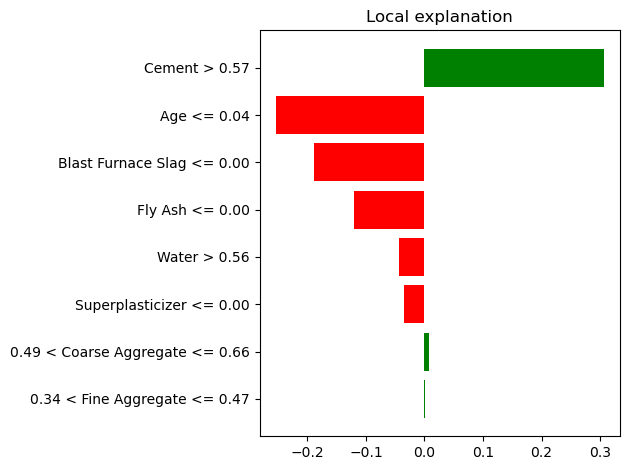

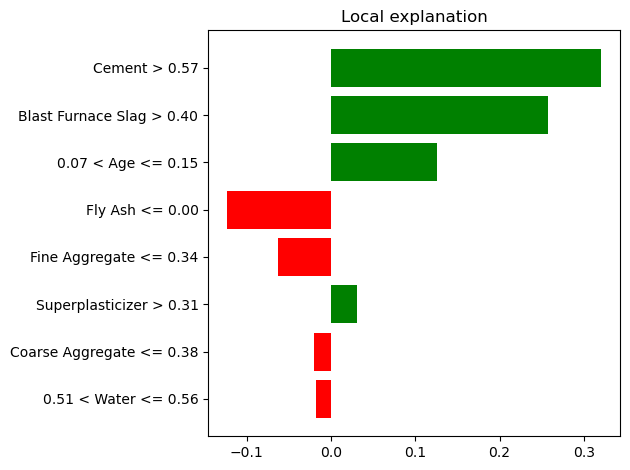

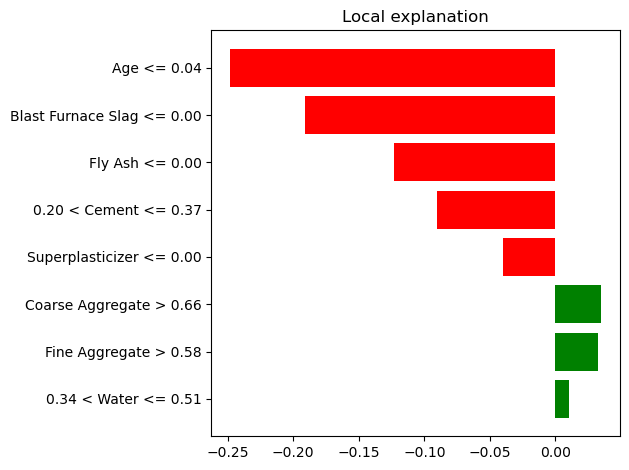

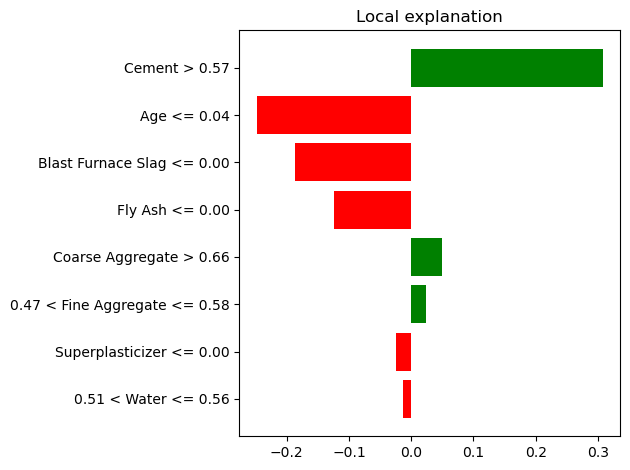

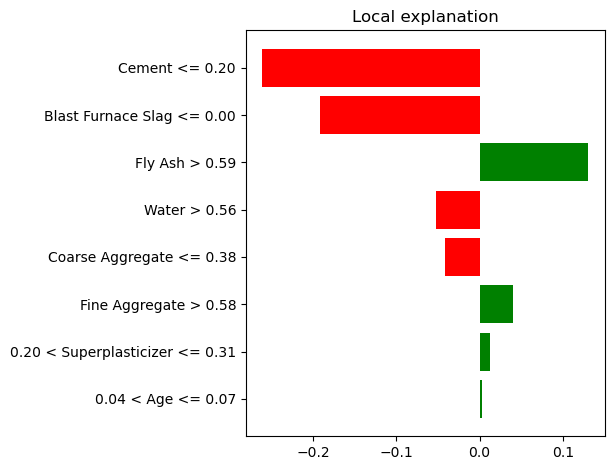

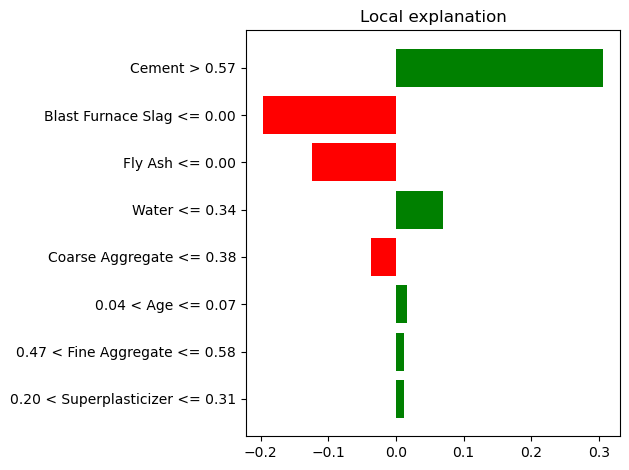

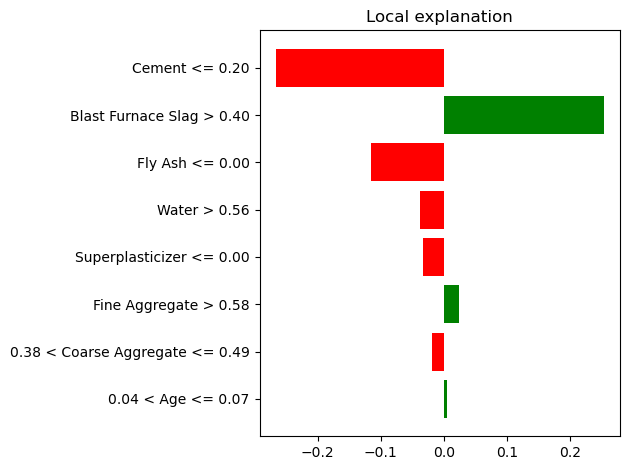

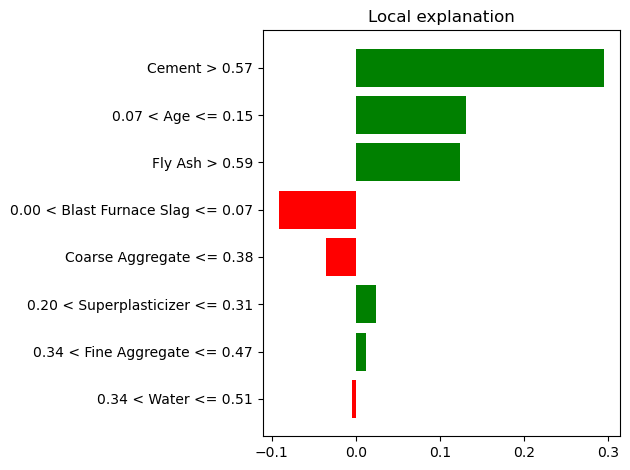

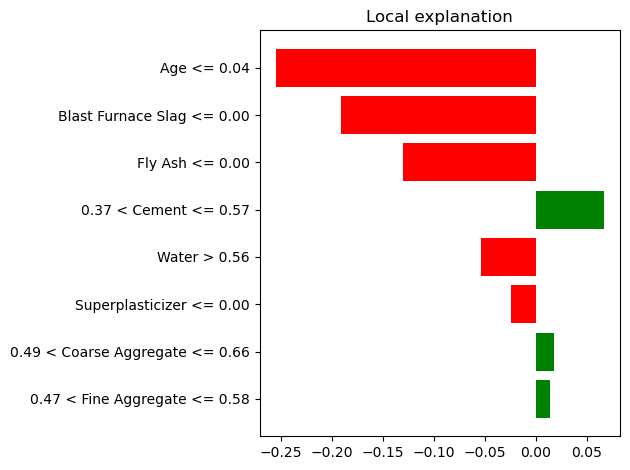

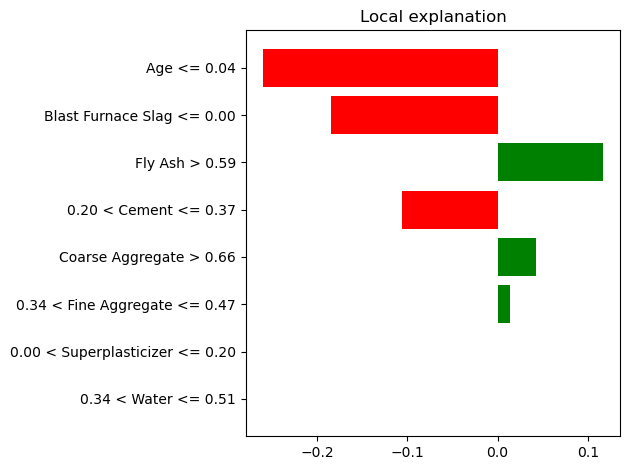

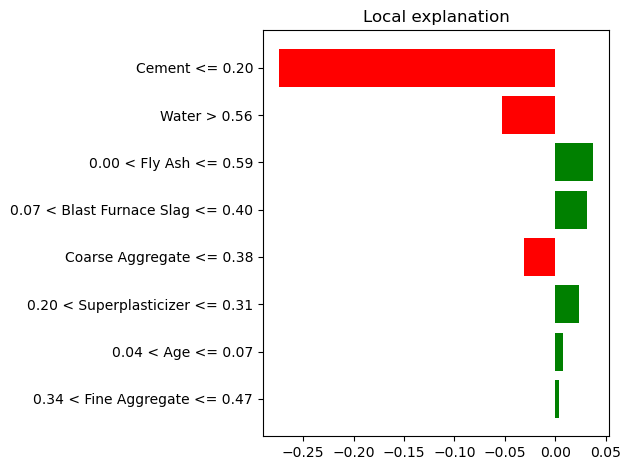

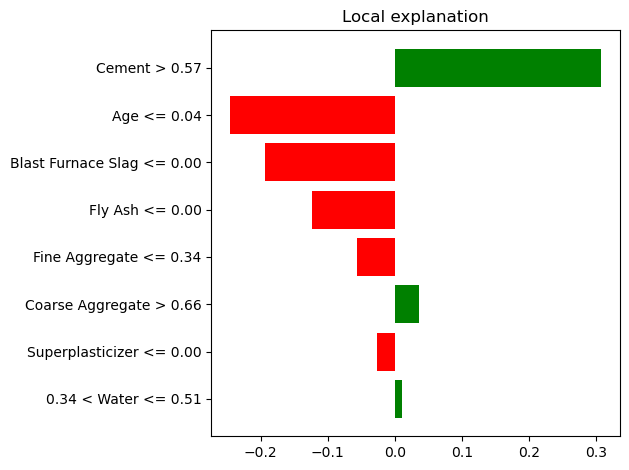

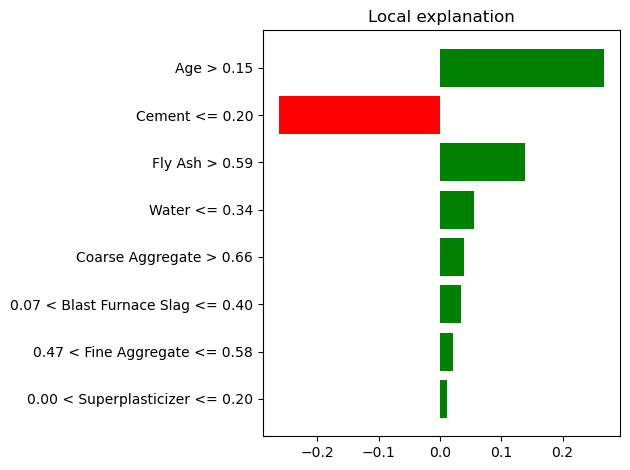

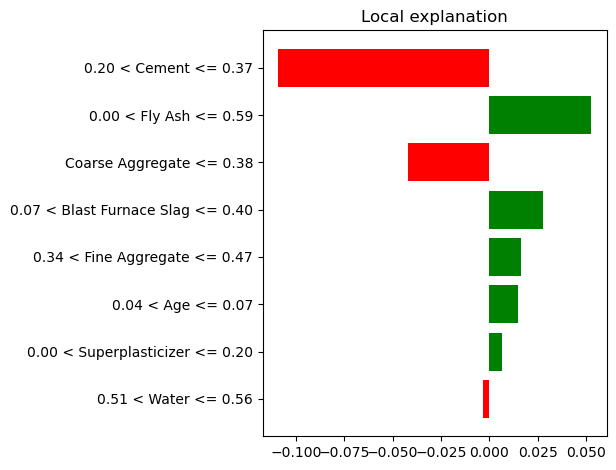

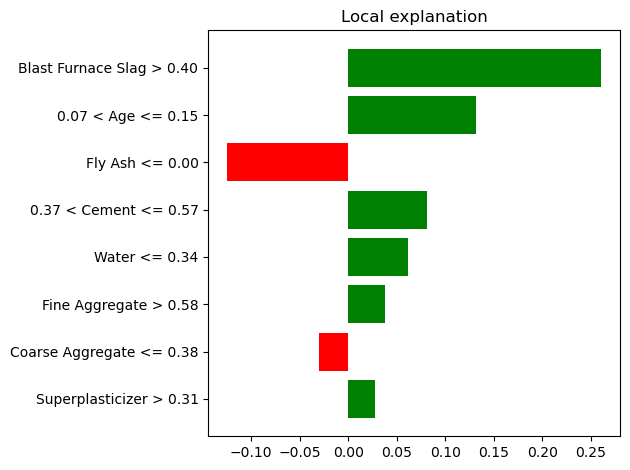

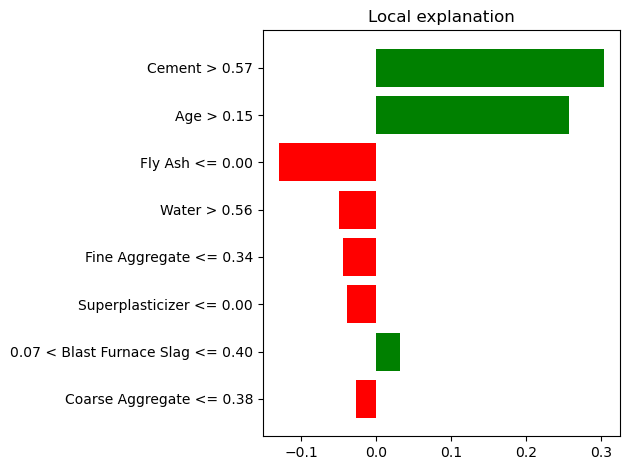

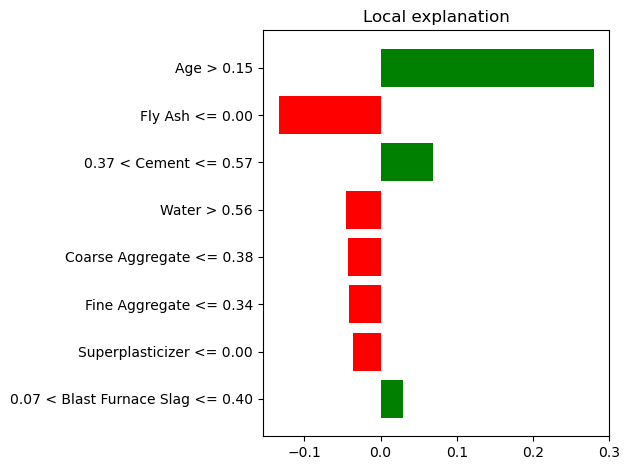

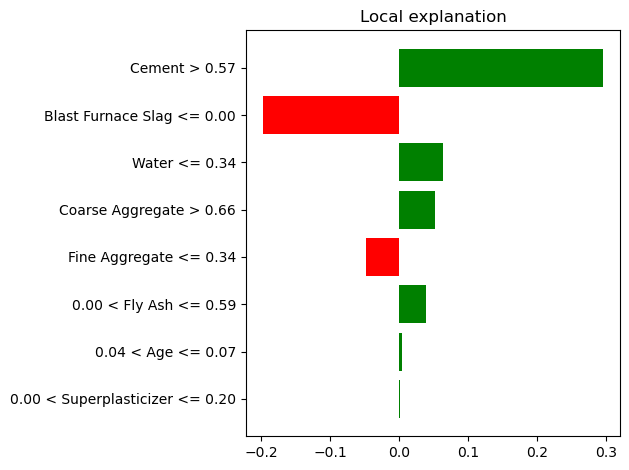

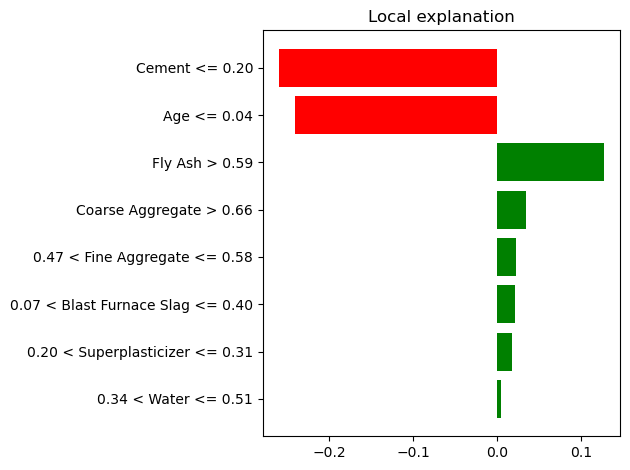

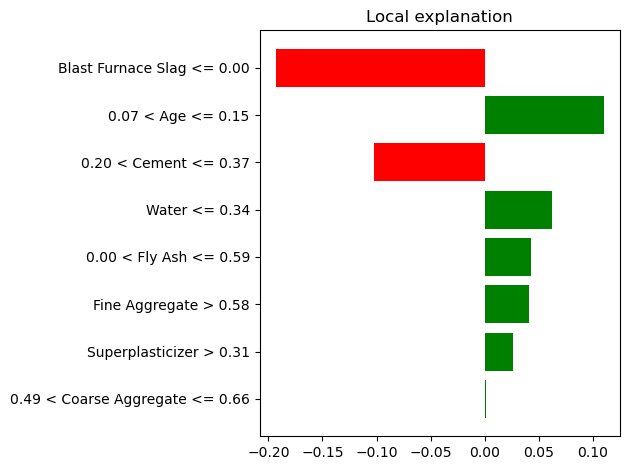

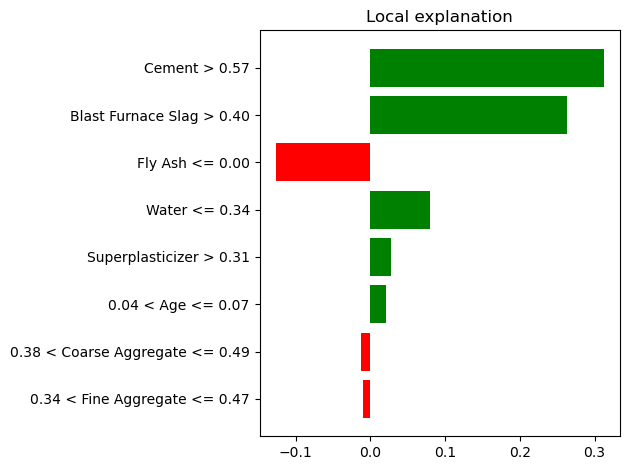

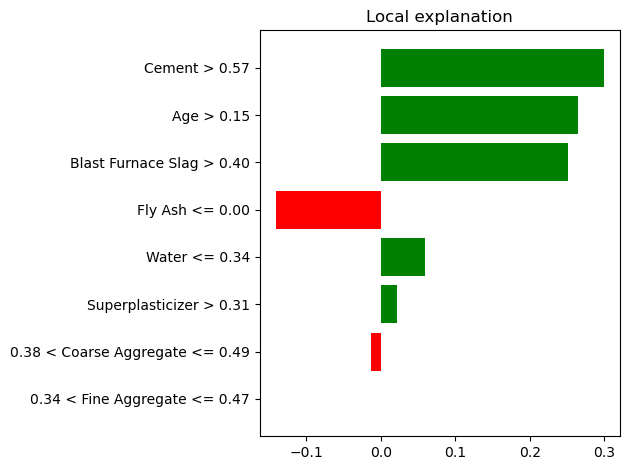

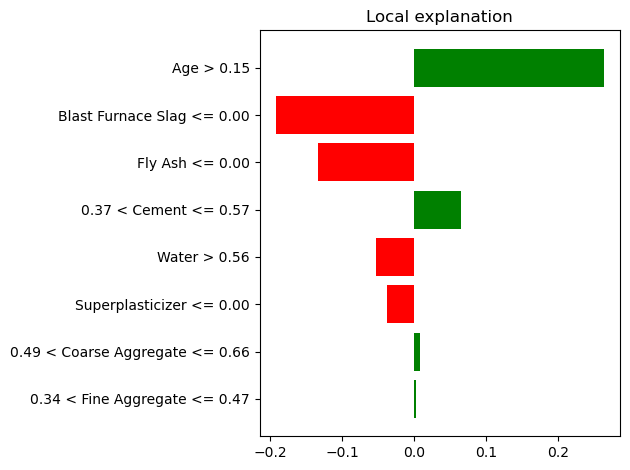

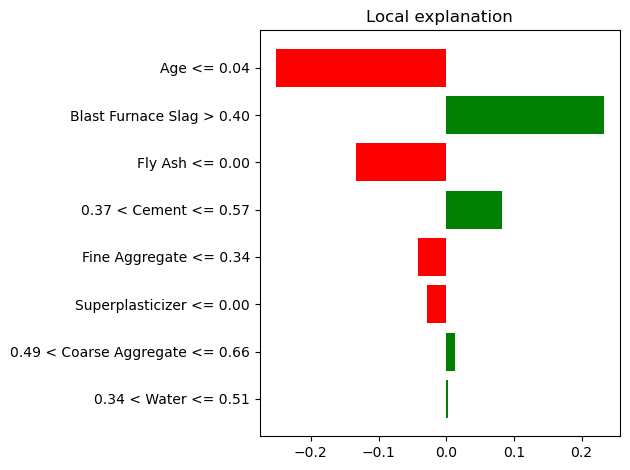

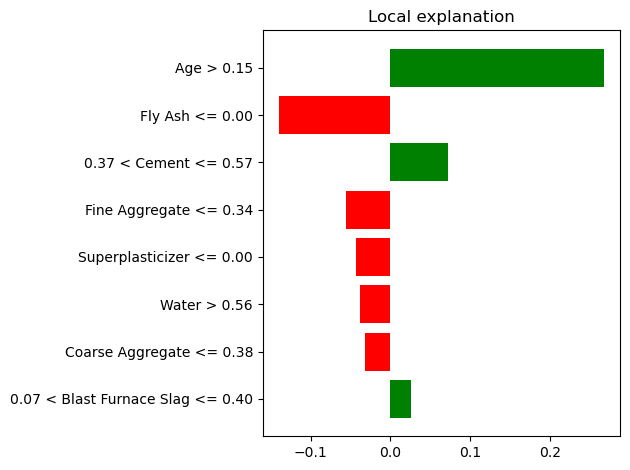

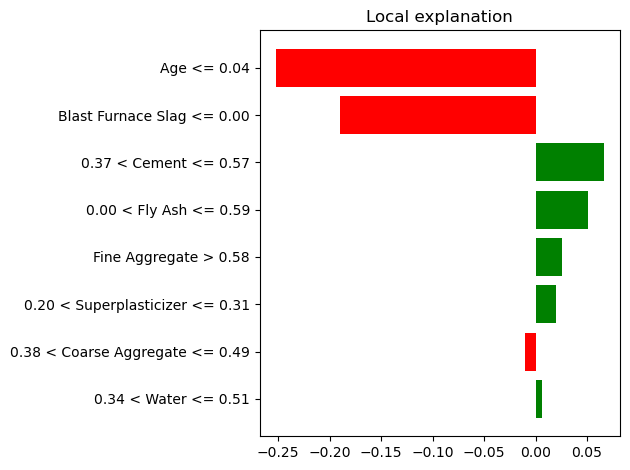

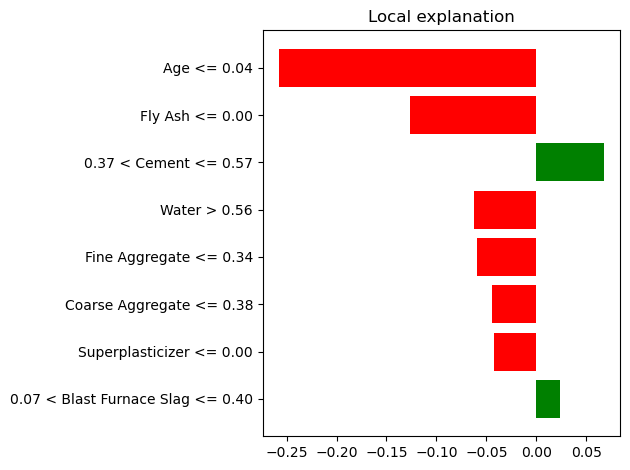

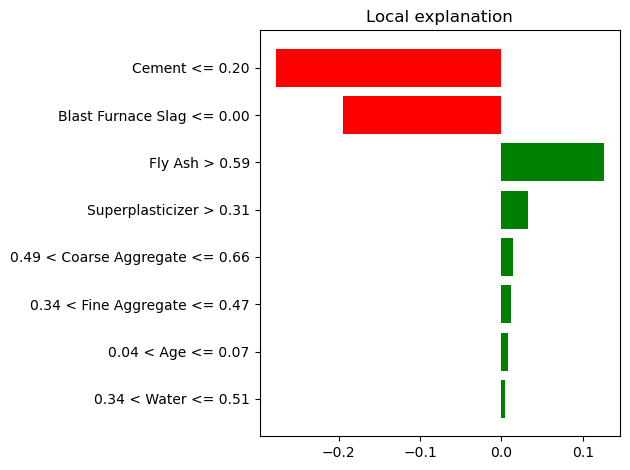

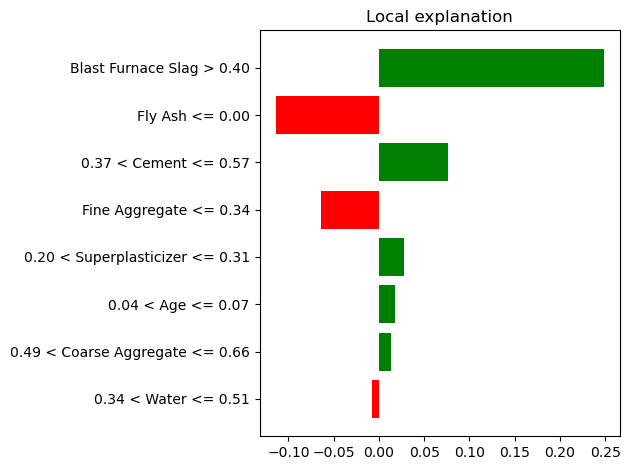

In [132]:
# let do lime test on first 30 testing samples with 8 features
for i in range(1,30):
    exp = myExplainer.explain_instance(X_test[i], model.predict, num_features=8)
    exp.as_pyplot_figure()
    plt.tight_layout()

## Explainability Test Explanation - LIME
As discussed earliar that the LIME test makes machine predictions interpretable by humans, the visuals above explain how
each features of the dataset set contributes to the target variable Strength.
The green bars indicate positive influence on the target. The longer the bar to the right, the stronger the relationship.
The red bars indicate negative influence on the target variable. The longer the bar to the left, the stronger the 
relationship. Both bars tending to zero means weak or no relationship on the target variable.
The LIME test makes the model a whitebox, thus every human can interpret how the model came about its decision on predicting
the target variable, Strength.

## Conclusion

In all we are able to train a deep regression model to predict the comprehensive strength of a concrete mix.
Some considerations were considered in order to possible represent the project in a business world.
Practical and Security consideration was not overlooked by employing techniques such as LIME test for model explainabilty
and Cryptographic encryptions to secure the model from bad actors.
Though the performance of the model is not the best, all standard methodologies were applied to this mini project.
It is also suggested to use hyperparameter tuning for the model to increase its performance, thus eliminating the 
overfitting problem.

### @bliboalbert ---github/LinkedIn